In [2]:
#DATA ANALYTICS IN ACTION - PART B

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('EconomicIndicators2019.xlsx')


In [3]:
# Initial Data Inspection for Understanding Structure and Identifying Cleaning Needs

dataset_info=df.info()
dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [4]:
unique_counts = df.nunique()
print(unique_counts)


No            177
Country       177
Continent      12
LifeExpect    177
GDPPC         177
MfgMn$        177
AgriMn$       177
CO2kt         167
HealthPC$     164
Pop_mn        165
dtype: int64


In [5]:
# DATA CLEANING 
# Missing/null values

dataset_is_null = df.isnull().sum()
dataset_is_null

No             0
Country        0
Continent      0
LifeExpect     0
GDPPC          0
MfgMn$         0
AgriMn$        0
CO2kt         10
HealthPC$     13
Pop_mn         0
dtype: int64

In [6]:
# Addressing spelling Mistakes in the 'Continent' Column

df['Continent'] = df['Continent'].replace({'Euro': 'Europe',
                                           'Afric': 'Africa',
                                           'N America': 'North America',
                                           'ASIA': 'Asia',
                                           'Asi': 'Asia'})


In [7]:
# Handling Missing Values for 'CO2kt' and 'HealthPC$'

# Impute missing values in 'CO2kt' with the median of the column
df['CO2kt'] = df['CO2kt'].fillna(df['CO2kt'].median())

# Impute missing values in 'HealthPC$' with the median of the column
df['HealthPC$'] = df['HealthPC$'].fillna(df['HealthPC$'].median())

# Display the updated DataFrame
df


,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,63.565,500.522981,1331.48,4872.44,11238.83,74.234104,37.77
1,2,Albania,Europe,79.282,5396.214227,963.57,2832.29,4993.30,393.829422,2.85
2,3,Algeria,Africa,76.474,4021.983608,40980.38,21189.60,170582.40,250.560776,42.71
3,4,Angola,Africa,62.448,2142.238757,4253.81,5463.38,24382.90,69.379341,32.35
4,5,Antigua and Barbuda,North America,78.691,18187.779712,37.48,29.25,509.00,801.543823,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,71.344,1795.201768,10575.35,14698.22,117687.80,98.587418,33.58
173,174,Vietnam,Asia,74.093,3491.091279,79534.52,39403.36,341716.80,173.650452,95.78
174,175,West Bank and Gaza,Asia,75.241,3656.858271,1924.90,1208.60,14960.80,393.829422,4.69
175,176,Zambia,Africa,62.793,1268.120941,1582.41,666.81,7615.70,67.457771,18.38


In [8]:
df.to_csv('EconomicIndicators2019_cleaned.csv', index=False)

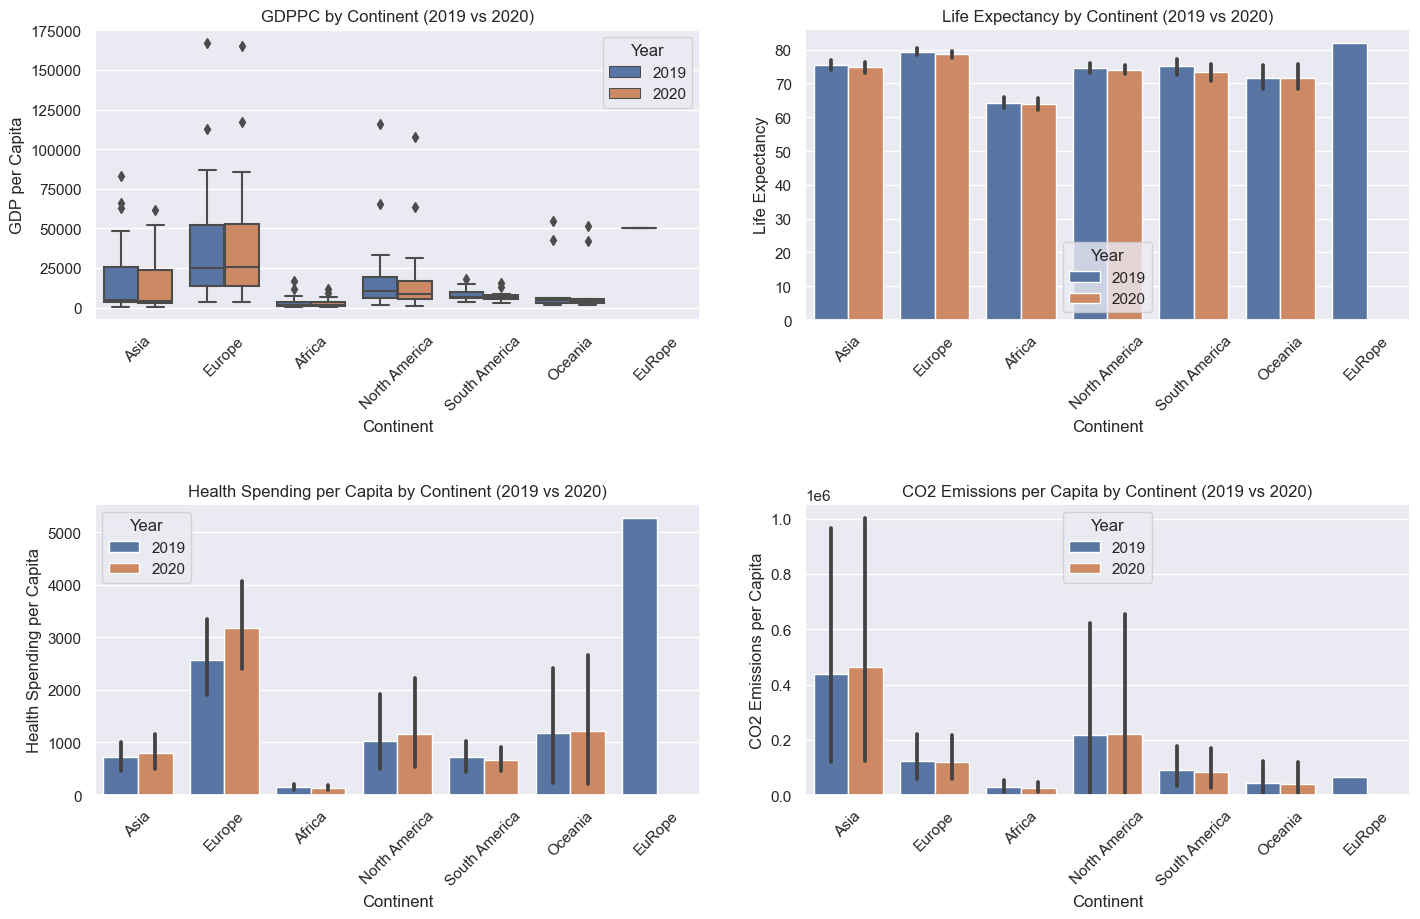

===== Summary Statistics =====
   Year         GDPPC  LifeExpect    HealthPC$          CO2kt
0  2019  17858.370082   73.353942  1112.169335  186390.256739
1  2020  16590.260056   72.670395  1228.635427  188213.095629


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data for 2019 and 2020
df_2019 = pd.read_csv('EconomicIndicators2019_cleaned.csv')
df_2020 = pd.read_excel('EconomicIndicators2020.xlsx')

# Add a 'Year' column to each DataFrame
df_2019['Year'] = '2019'
df_2020['Year'] = '2020'

# Combine data for both years
df_combined = pd.concat([df_2019, df_2020], ignore_index=True)

# Set the style for seaborn visualizations
sns.set_theme()

# Visualizations
plt.figure(figsize=(15, 10))

# Example 1: Boxplot for GDPPC by Continent
plt.subplot(2, 2, 1)
sns.boxplot(data=df_combined, x='Continent', y='GDPPC', hue='Year')
plt.title('GDPPC by Continent (2019 vs 2020)')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)  # Tilt x-axis labels

# Example 2: Barplot for LifeExpect by Continent
plt.subplot(2, 2, 2)
sns.barplot(data=df_combined, x='Continent', y='LifeExpect', hue='Year')
plt.title('Life Expectancy by Continent (2019 vs 2020)')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)  # Tilt x-axis labels

# Example 3: Barplot for HealthPC$ by Continent
plt.subplot(2, 2, 3)
sns.barplot(data=df_combined, x='Continent', y='HealthPC$', hue='Year')
plt.title('Health Spending per Capita by Continent (2019 vs 2020)')
plt.xlabel('Continent')
plt.ylabel('Health Spending per Capita')
plt.xticks(rotation=45)  # Tilt x-axis labels

# Example 4: Barplot for CO2kt by Continent
plt.subplot(2, 2, 4)
sns.barplot(data=df_combined, x='Continent', y='CO2kt', hue='Year')
plt.title('CO2 Emissions per Capita by Continent (2019 vs 2020)')
plt.xlabel('Continent')
plt.ylabel('CO2 Emissions per Capita')
plt.xticks(rotation=45)  # Tilt x-axis labels

# Adjust layout with increased spacing between subplots
plt.tight_layout(pad=3.0)

# Show plots
plt.show()

# Generate summary statistics for key indicators
summary_stats = df_combined.groupby(['Year']).agg({
    'GDPPC': 'mean',
    'LifeExpect': 'mean',
    'HealthPC$': 'mean',
    'CO2kt': 'mean'
}).reset_index()

# Print summary statistics
print("===== Summary Statistics =====")
print(summary_stats)
